# Skrinning Stuff

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import solarpy
import datetime

currentDir = os.getcwd()
sys.path.append(os.path.join(currentDir, '../code/'))
import geomUtils as geom
import IceSheet

In [2]:
geom.charLength('hex', [2.])

1.7320508075688774

In [3]:
diamsCrystal = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.])  # m
gapMelt = 1.e-4  # m

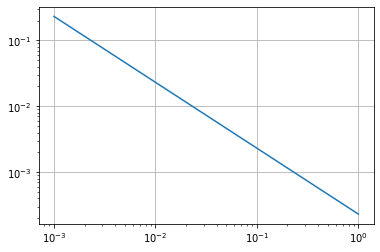

In [4]:
porosities = [(geom.periphery('hex', [x])*gapMelt/2)/(geom.area('hex', [x])) for x in diamsCrystal]
plt.loglog(diamsCrystal, porosities)
plt.grid()

In [5]:
mySheet = IceSheet.IceSheet(iceType='blackIce', thickness=100.0, crystalSize=100.0)

Ice type: blackIce


In [6]:
spatialNodeCount = 51
timeStepCount = 101

In [7]:
vnorm = np.array([0, 0, -1])  # plane pointing zenith
alt = 10  # m (above sea-level)
date = datetime(2021, 3, 7, 10, 0)  # year, month, day, hour, minute
lat = 55.71  # Lund
# lat = 59.33  # Stockholm

S0 = irradiance_on_plane(vnorm, alt, date, lat)
S0

TypeError: 'module' object is not callable

In [ ]:
A, B, b, U0 = mySheet.setupModel(IC=[-2., 0.], windSpeed=5., aEnv=[0.15, 0.75, 0.1], TEnv=[-2.0, -20.0, -270.], S0=S0, Nx=spatialNodeCount, Ny=timeStepCount)
A

In [ ]:
Us = []
Us.append(U0)
U = U0

for idx in range(1, timeStepCount):
    U = np.linalg.solve(A, B.dot(U) + b)
    Us.append(U)
    
USoln = np.array(Us)

**TODO** Need to get dx, dy, zStep, tStep, zScale, tScale from mySheet

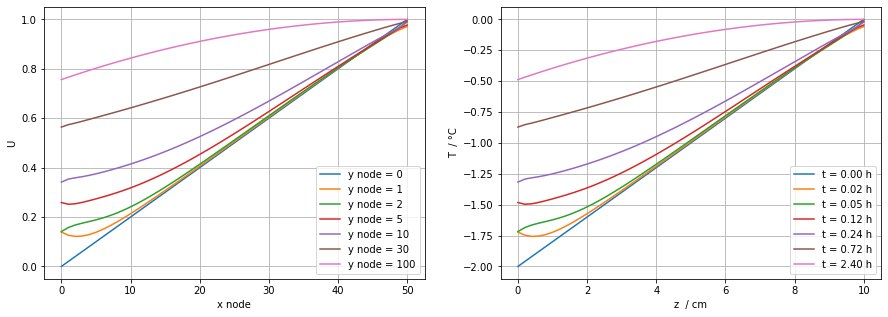

In [23]:
timeIndeces = np.array([0, 1, 2, 5, 10, 30, timeStepCount-1])

THi = 0.
TLo = -2.
TSoln = USoln*(THi - TLo) + TLo
z = np.linspace(0, spatialNodeCount, spatialNodeCount)*mySheet._h0/spatialNodeCount*100  # cm
t = np.linspace(0, timeStepCount, timeStepCount)*8770./timeStepCount/3660  # h

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for timeIndex in timeIndeces:
    i = 0
    axs[i].plot(range(spatialNodeCount), USoln[timeIndex, :], label='y node = '+'{}'.format(timeIndex))
    i = 1
    axs[i].plot(z, TSoln[timeIndex, :], label='t = '+'{:.2f} h'.format(t[timeIndex]))
i = 0
axs[i].set_xlabel('x node')
axs[i].set_ylabel('U')
i = 1
axs[i].set_xlabel('z  / cm')
axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].legend()
    axs[i].grid()

### Simulate a Day or Two

In [8]:
totalTime = 30*3600  # s
timeStep = 15*60  # s
timeStepCount = totalTime//timeStep

In [17]:
dateTimeStart = datetime.datetime(2021, 3, 1, 6, 0)
vnorm = np.array([0, 0, -1])  # plane pointing zenith
alt = 10  # m (above sea-level)
lat = 55.71  # Lund
# lat = 59.33  # Stockholm

dateTime = []
S0 = []
tSoln = []
USoln = []
for step in range(timeStepCount):
    time = step*timeStep
    clockHour = (6 + time/3600) % 24
    dateTime.append(dateTimeStart + datetime.timedelta(seconds=+time))
    S0.append(solarpy.irradiance_on_plane(vnorm, alt, dateTime[-1], lat))

    # update irradiation(S0, clockHour)
    # update ice sheet surface temperature?
    # make possible for kwarg IC to accept temperature profile
    # add kwarg silent=True
#     A, B, b, U0 = mySheet.setupModel(IC=[-2.0+step/1000, 0.], windSpeed=5., aEnv=[0.15, 0.75, 0.1], TEnv=[-2.0, -20.0, -270.], S0=300., Nx=spatialNodeCount, Ny=timeStepCount)
    # output also: bIrradiance, porosity(z), ...
#     U = np.linalg.solve(A, B.dot(U) + b)
#     if (clockHour % 1) == 0:
#         tSoln.append(clockHour)
#         USoln.append(U)
    

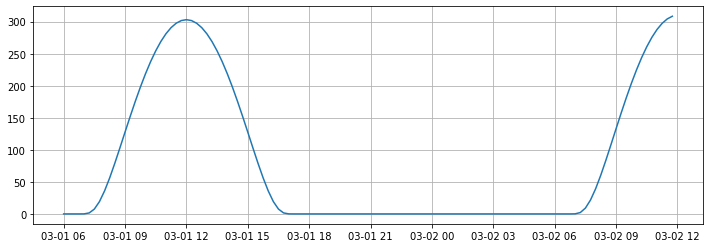

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(dateTime, S0)
ax.grid()

In [33]:
USoln = np.array(USoln)

In [35]:
USoln.shape

(30, 51)

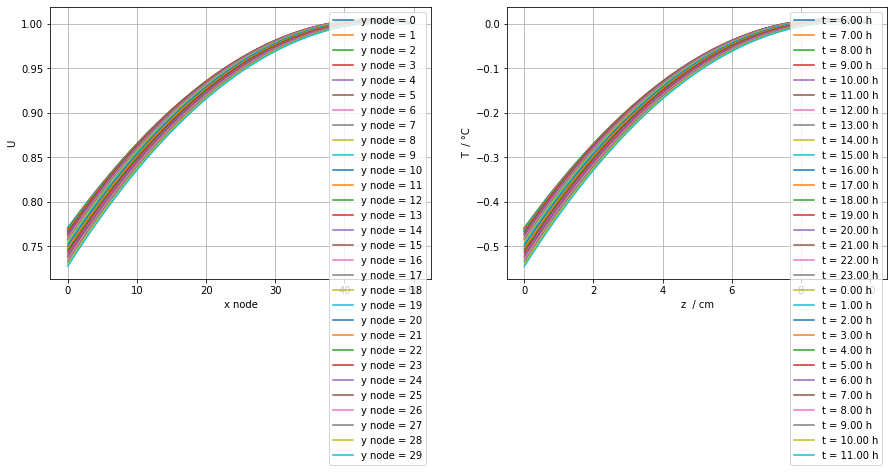

In [37]:
THi = 0.
TLo = -2.
TSoln = USoln*(THi - TLo) + TLo
z = np.linspace(0, spatialNodeCount, spatialNodeCount)*mySheet._h0/spatialNodeCount*100  # cm
t = np.linspace(0, timeStepCount, timeStepCount)*8770./timeStepCount/3660  # h

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for j in range(len(tSoln)):
    i = 0
    axs[i].plot(range(spatialNodeCount), USoln[j, :], label='y node = '+'{}'.format(j))
    i = 1
    axs[i].plot(z, TSoln[j, :], label='t = '+'{:.2f} h'.format(tSoln[j]))
i = 0
axs[i].set_xlabel('x node')
axs[i].set_ylabel('U')
i = 1
axs[i].set_xlabel('z  / cm')
axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].legend()
    axs[i].grid()